In [21]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
#Machine Learning 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [22]:
def data_preprocessing(data_path):
    #Load the data
    data = pd.read_csv(data_path)
    data.drop(["Index"], axis="columns", inplace= True)
    #data["Class"].unique() #Two classes 2: (benign) 4(Malignant)
    
    #Remove weired charaters and symboles
    data = data[~data.isin(['No idea', '#', '?'])]
    
    #drop missing values
    data.dropna(inplace=True)
    
    #convert to numeric
    data= data.astype(np.int64).copy()
    
    #Drop duplicates
    data.drop_duplicates(subset="ID", inplace=True)
    
    #Transform data
    data=data.applymap(lambda x: x/10 if x>10 else x)
    return data
    

## Empirical Data Analysis

In [23]:
data_path = "./data/breast-cancer-wisconsin.txt"
data = data_preprocessing(data_path)
diagnosis_cat = list(data["Class"])
print("Malignant",diagnosis_cat.count(4))
print("Benign",diagnosis_cat.count(2))

Malignant 249
Benign 401


In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,650.0,139925.098000,187827.928134,6337.5,89071.6,117463.45,125176.925,1345435.2
Clump Thickness,650.0,4.613846,2.871161,1.0,2.0,4.00,6.000,10.0
Uniformity of Cell Size,650.0,3.355385,3.147848,1.0,1.0,1.00,5.000,10.0
Uniformity of Cell Shape,650.0,3.409231,3.044899,1.0,1.0,2.00,5.000,10.0
Marginal Adhesion,650.0,3.032308,2.986441,1.0,1.0,1.00,4.000,10.0
Single Epithelial Cell Size,650.0,3.310769,2.234767,1.0,2.0,2.00,4.000,10.0
Bare Nuclei,650.0,3.795385,3.724691,1.0,1.0,1.00,8.000,10.0
Bland Chromatin,650.0,3.550769,2.462922,1.0,2.0,3.00,5.000,10.0
Normal Nucleoli,650.0,3.090769,3.173864,1.0,1.0,1.00,5.000,10.0
Mitoses,650.0,1.864615,2.198923,1.0,1.0,1.00,1.000,10.0


### Visualization

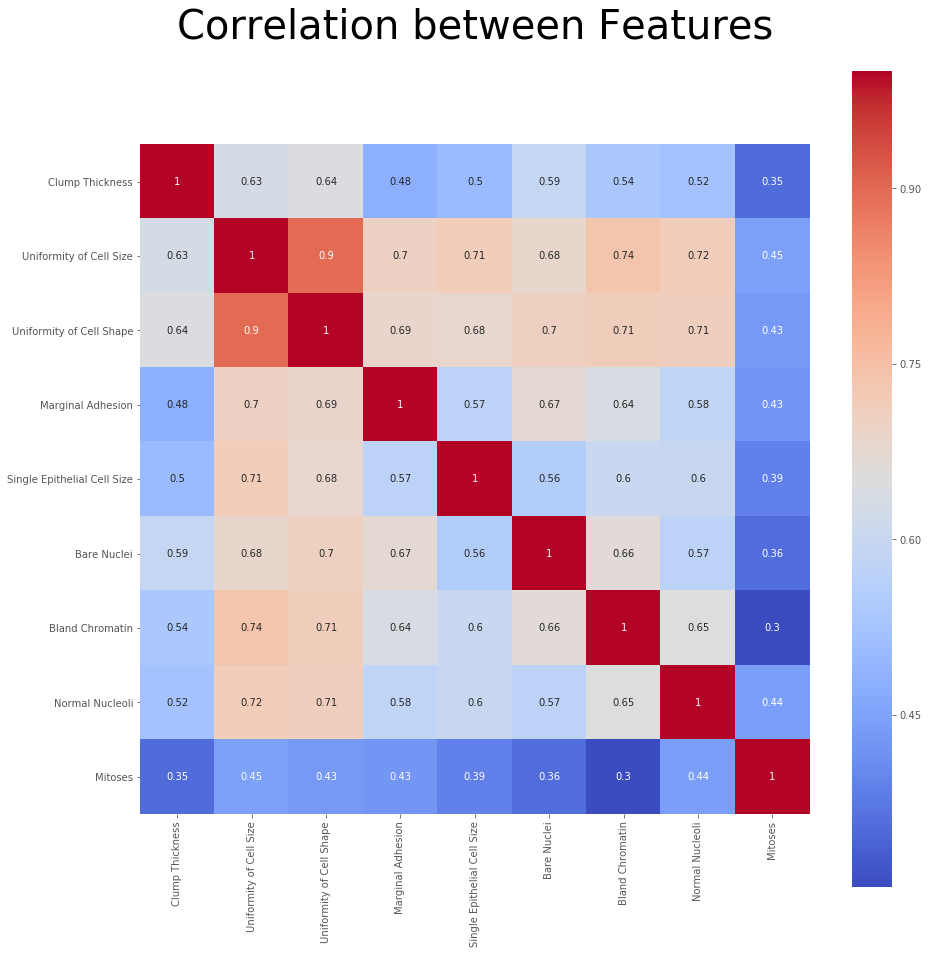

In [25]:
feature_names = list(data.columns[1:10]) # Exclude the ID
plt.figure(figsize=(15,15))
sns.heatmap(data[feature_names].corr(), annot=True, square=True, cmap='coolwarm')
plt.title("Correlation between Features", fontsize=40)
ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.15])
plt.savefig('./figures/feature_correlation.png', bbox_inches='tight')
plt.show()

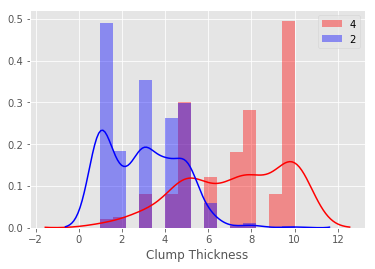

In [26]:
bins = 15

sns.distplot(data[data['Class']==4][feature_names[0]], bins=bins, color='red', label='4');
sns.distplot(data[data['Class']==2][feature_names[0]], bins=bins, color='blue', label='2');
plt.legend(loc='upper right')
plt.savefig('./figures/dist_clump.png', bbox_inches='tight')


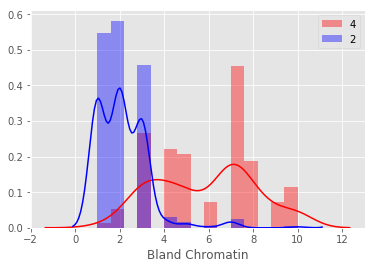

In [27]:

sns.distplot(data[data['Class']==4][feature_names[6]], bins=bins, color='red', label='4');
sns.distplot(data[data['Class']==2][feature_names[6]], bins=bins, color='blue', label='2');
plt.legend(loc='upper right')
plt.savefig('./figures/dist_bland.png', bbox_inches='tight')


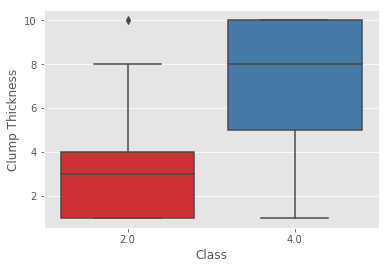

In [28]:
sns.boxplot(x='Class', y=feature_names[0], data=data, palette="Set1")
plt.savefig('./figures/bar_clump.png', bbox_inches='tight')

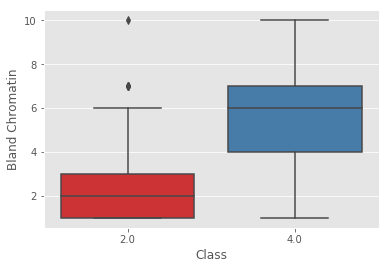

In [29]:

sns.boxplot(x='Class', y=feature_names[6], data=data, palette="Set1")
plt.savefig('./figures/bar_bland.png', bbox_inches='tight')

## Modelling

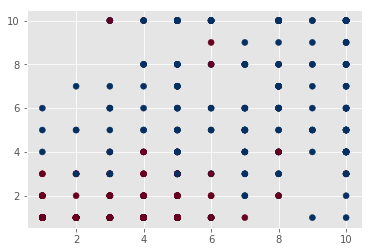

In [30]:
X = data.loc[:,feature_names]
y = data.loc[:, 'Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, cmap='RdBu');
plt.savefig('./figures/scatter_features.png', bbox_inches='tight')

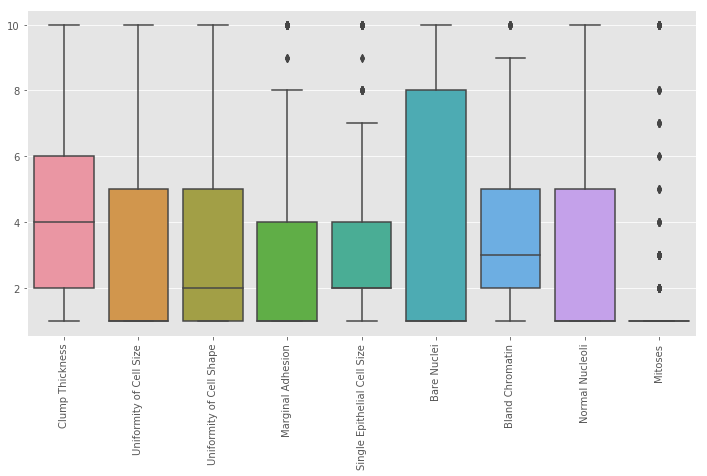

In [31]:
k=plt.figure(figsize=(12,6))
k=sns.boxplot(data=X)
k=plt.xticks(rotation=90)
plt.savefig('./figures/bar_features.png', bbox_inches='tight')

In [32]:
print("Size of the training set",X_train.shape)
print("Size of the testing set",X_test.shape)

Size of the training set (435, 9)
Size of the testing set (215, 9)


In [33]:
#Logistic Regression
model_LR = LogisticRegression() # initialize classifier
model_LR.fit(X_train, y_train) #fit classifier with the train data set X_train
prediction = model_LR.predict(X_test) #Make prediction using X_test
scores = cross_val_score(model_LR, X, y, cv=4) #Estimate accuracy 
print("Logistic Regression Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print(classification_report(prediction,y_test))
# print (confusion_matrix(y_test,prediction))

Logistic Regression Classifier Accuracy: 93.95%
Cross validation score: 95.70% (+/- 3.88%)
             precision    recall  f1-score   support

        2.0       0.94      0.96      0.95       132
        4.0       0.94      0.90      0.92        83

avg / total       0.94      0.94      0.94       215



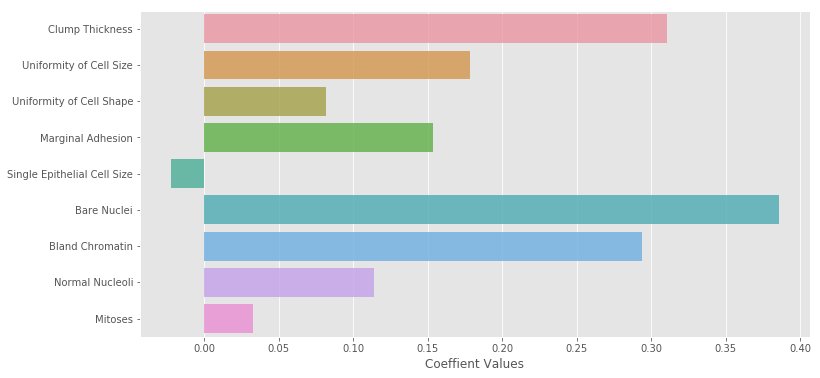

In [34]:
f=plt.figure(figsize=(12,6))
# f=sns.set_color_codes("pastel")
f=sns.barplot(y=X_train.columns, x=model_LR.coef_[0],alpha=0.8)
plt.xlabel('Coeffient Values')
# plt.tight_layout
plt.savefig('./figures/feature_importance.png', bbox_inches='tight')

In [35]:
#GaussianNB
model_NB = GaussianNB() # initialize classifier
model_NB.fit(X_train, y_train) #fit classifier with the train data set X_train
prediction = model_NB.predict(X_test) #Make prediction using X_test
scores = cross_val_score(model_NB, X, y, cv=4) #Estimate accuracy 
print("GaussianNB Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print(classification_report(prediction,y_test))

GaussianNB Classifier Accuracy: 93.02%
Cross validation score: 95.39% (+/- 3.31%)
             precision    recall  f1-score   support

        2.0       0.90      0.98      0.94       124
        4.0       0.97      0.86      0.91        91

avg / total       0.93      0.93      0.93       215



In [36]:
#Random Forest
model_RF = RandomForestClassifier() # initialize classifier
model_RF.fit(X_train, y_train) #fit classifier with the train data set X_train
prediction = model_RF.predict(X_test) #Make prediction using X_test
scores = cross_val_score(model_RF, X, y, cv=4) #Estimate accuracy 

print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print(classification_report(prediction,y_test))

Random Forest Accuracy: 94.88%
Cross validation score: 96.61% (+/- 2.70%)
             precision    recall  f1-score   support

        2.0       0.94      0.98      0.96       130
        4.0       0.96      0.91      0.93        85

avg / total       0.95      0.95      0.95       215



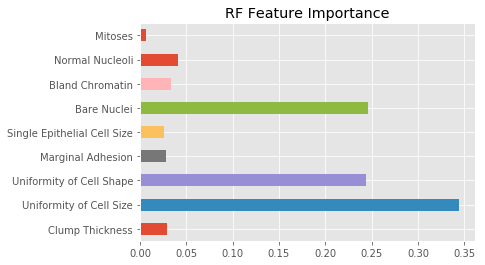

In [37]:
#Feature Importance

(pd.Series(model_RF.feature_importances_, index=X.columns).plot(kind='barh'))
plt.title("RF Feature Importance")
plt.savefig('./figures/rf_impor', bbox_inches='tight')


In [38]:
#Gradient Boosting Classifier
model_GB = GradientBoostingClassifier() # initialize classifier
model_GB.fit(X_train, y_train) #fit classifier with the train data set X_train
prediction = model_GB.predict(X_test) #Make prediction using X_test
scores = cross_val_score(model_GB, X, y, cv=4) #Estimate accuracy 

print("Gradient Boosting Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print(classification_report(prediction,y_test))

Gradient Boosting Accuracy: 94.88%
Cross validation score: 96.15% (+/- 3.08%)
             precision    recall  f1-score   support

        2.0       0.95      0.97      0.96       132
        4.0       0.95      0.92      0.93        83

avg / total       0.95      0.95      0.95       215



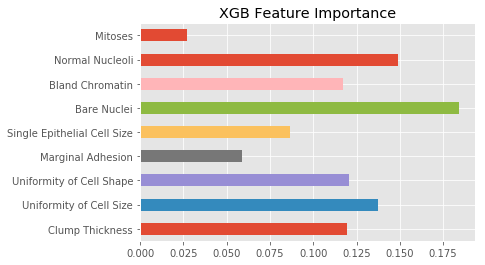

In [39]:
#Feature Importance

(pd.Series(model_GB.feature_importances_, index=X.columns).plot(kind='barh'))
plt.title("XGB Feature Importance")
plt.savefig('./figures/xgb_impor', bbox_inches='tight')
